In [28]:
# UCSD ECE 143 Programming for Data Analysis
# Winter 2023
# Author: m3cheung@ucsd.edu
# Final Project: create mmr by race bar graph for years 2018-2021

CODES FOR TIMELINE
1. During Pregnancy:

Import modules

In [29]:
import pandas as pd
import plotly.express as px
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

Load csv files into Pandas DataFrames

In [60]:
pregnancy_deaths_df = pd.read_csv(
    "../data_csv/pregnancy_timeline/1-during_pregnancy_deaths.csv").drop(columns=["Notes", "Year Code", "Population", "Crude Rate"])
delivery_deaths_df = pd.read_csv(
    "../data_csv/pregnancy_timeline/2-day_of_delivery_deaths.csv").drop(columns=["Notes", "Year Code", "Population", "Crude Rate"])
before_42_deaths_df = pd.read_csv(
    "../data_csv/pregnancy_timeline/3-before_42_days_deaths.csv").drop(columns=["Notes", "Year Code", "Population", "Crude Rate"])
lmd_df = pd.read_csv(
    "../data_csv/pregnancy_timeline/4-total_lmd_by_year.csv").drop(columns=["Notes", "Year Code", "Population", "Crude Rate"])
total_deaths_df = pd.read_csv(\
    "../data_csv/pregnancy_timeline/5-total_deaths_include_lmd_by_year.csv").drop(columns=["Notes", "Year Code", "Population", "Crude Rate"])

pregnancy_deaths_df = pregnancy_deaths_df.dropna()
delivery_deaths_df  = delivery_deaths_df.dropna()
before_42_deaths_df = before_42_deaths_df.dropna()
lmd_df              = lmd_df.dropna()
total_deaths_df     = total_deaths_df.dropna()

display(pregnancy_deaths_df)
display(delivery_deaths_df)
display(before_42_deaths_df)
display(lmd_df)
display(total_deaths_df)


,Year,Deaths
0,2018.0,474.0
1,2019.0,565.0
2,2020.0,698.0
3,2021.0,1050.0


,Year,Deaths
0,2018.0,90.0
1,2019.0,83.0
2,2020.0,77.0
3,2021.0,74.0


,Year,Deaths
0,2018.0,94.0
1,2019.0,106.0
2,2020.0,86.0
3,2021.0,81.0


,Year,Deaths
0,2018.0,315.0
1,2019.0,349.0
2,2020.0,427.0
3,2021.0,482.0


,Year,Deaths
0,2018.0,973.0
1,2019.0,1103.0
2,2020.0,1288.0
3,2021.0,1687.0


Clean up data and create percentage columns

In [68]:
pregnancy_deaths_df = pregnancy_deaths_df.rename(
    columns={"Deaths":"During Pregnancy"})
delivery_deaths_df = delivery_deaths_df.rename(
    columns={"Deaths": "During Labour or Delivery"})
before_42_deaths_df = before_42_deaths_df.rename(
    columns={"Deaths": "After Childbirth, Before 42 Days"})
lmd_df = lmd_df.rename(
    columns={"Deaths": "Late Maternal Deaths"})
total_deaths_df = total_deaths_df.rename(
    columns={"Deaths": "Total Deaths"})

deaths_df = pd.concat([pregnancy_deaths_df, delivery_deaths_df["During Labour or Delivery"], before_42_deaths_df["After Childbirth, Before 42 Days"], lmd_df["Late Maternal Deaths"]], axis=1)

display(deaths_df)

pie2021 = deaths_df[deaths_df["Year"]==2018.0].reset_index(drop=True).melt(id_vars ="Year", value_name = "Deaths")

display(pie2021)

# test = percent_df
# test["Total Deaths"] = percent_df["Total Deaths"]-percent_df["Total Deaths Postpartum"]
# test["Total Deaths Postpartum"] = percent_df["Total Deaths Postpartum"]-percent_df["Late Maternal Deaths"]
# long_df = test[test["Year"]==2018.0].reset_index(drop=True).melt(id_vars="Year", value_name="Count")
# display(long_df)

# percent_df["Percentage of Postpartum Deaths"] = percent_df["Total Deaths Postpartum"]/percent_df["Total Deaths"] * 100
# percent_df["Percentage of Late Maternal Deaths"] = percent_df["Late Maternal Deaths"]/percent_df["Total Deaths"] * 100
# percent_df["Total Diff"] = percent_df["Total Deaths"] - percent_df["Total Deaths Postpartum"]
# percent_df["PPD Diff"] = percent_df["Total Deaths Postpartum"] - \
# percent_df["Late Maternal Deaths"]

# display(percent_df)

,Year,During Pregnancy,During Labour or Delivery,"After Childbirth, Before 42 Days",Late Maternal Deaths
0,2018.0,474.0,90.0,94.0,315.0
1,2019.0,565.0,83.0,106.0,349.0
2,2020.0,698.0,77.0,86.0,427.0
3,2021.0,1050.0,74.0,81.0,482.0


,Year,variable,Deaths
0,2018.0,During Pregnancy,474.0
1,2018.0,During Labour or Delivery,90.0
2,2018.0,"After Childbirth, Before 42 Days",94.0
3,2018.0,Late Maternal Deaths,315.0


Calculate MMR for each row

,Single Race 6,Year,Births,Deaths,"MMR per 100,000 Live Births"
3,Asian,2018.0,240798.0,32.0,13.0
4,Asian,2019.0,238769.0,33.0,14.0
5,Asian,2020.0,219068.0,27.0,12.0
6,Asian,2021.0,213813.0,36.0,17.0
7,Black or African American,2018.0,552029.0,206.0,37.0
8,Black or African American,2019.0,548075.0,241.0,44.0
9,Black or African American,2020.0,529811.0,293.0,55.0
10,Black or African American,2021.0,517889.0,362.0,70.0
11,White,2018.0,1956413.0,291.0,15.0
12,White,2019.0,1915912.0,343.0,18.0


Create PIE graph

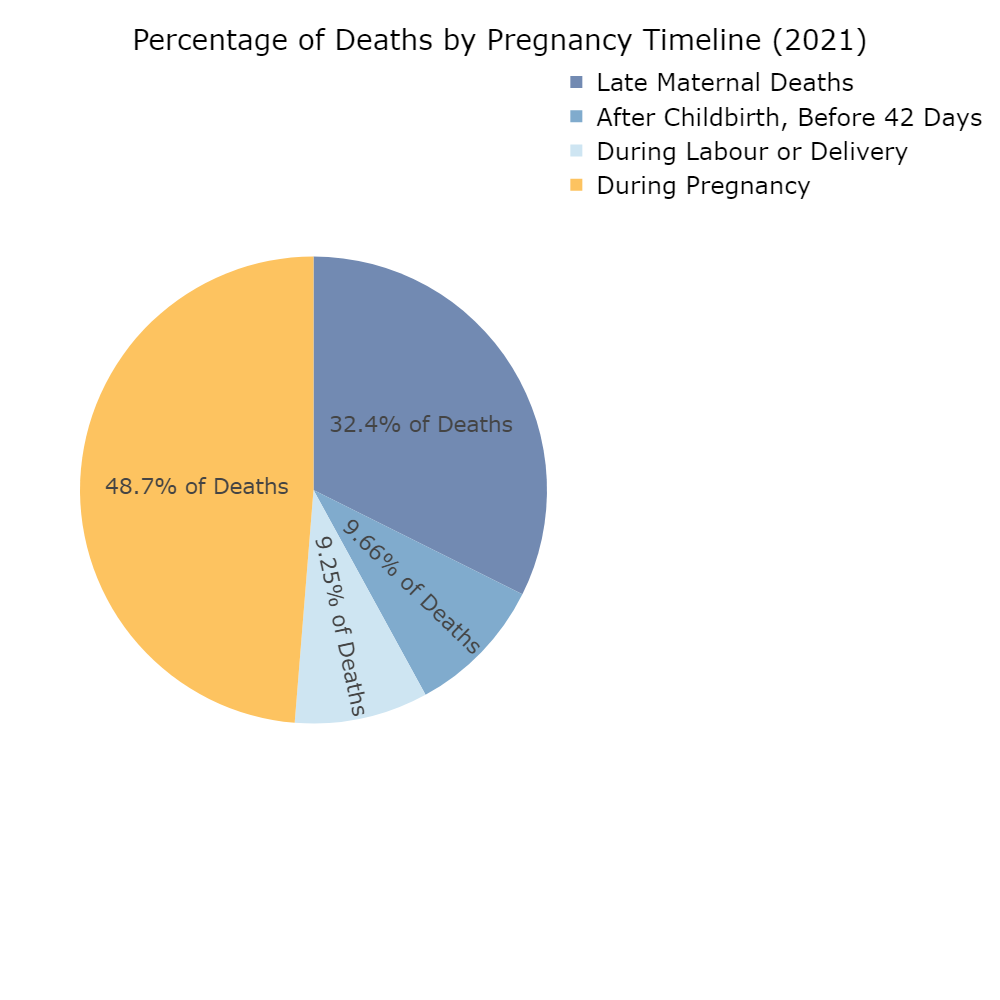

In [114]:
# use plotly's pie function
# first argument is the datafram, then put your x and y axis
# colors the column name referencing the different bars in each group, if you want to group the bars by the x-axis, use group bar mode
# category_orders helps order the bars, I wanted ascending order
#
fig = px.pie(pie2021, values="Deaths", names="variable",
                   category_orders={"variable": [
                       "Late Maternal Deaths", "After Childbirth, Before 42 Days", "During Labour or Delivery", "During Pregnancy"]},
                   color_discrete_sequence=[
                       "rgb(114, 138, 178)", "rgb(128, 171, 205)", "rgb(206, 229, 242)", "rgb(253, 195, 96)"])
fig.update_layout(title={
                  'text': 'Percentage of Deaths by Pregnancy Timeline (2021)',
                  'xanchor': 'center',
                  'yanchor': 'top',
                  'x': 0.5})

fig.update_traces(sort=False, textposition='inside', textinfo='percent', texttemplate='%{percent} of Deaths')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')

fig.update_layout(
    font_family="Verdana",
    font_color="black",
    font_size=24,
    title_font_family="Verdana",
    title_font_color="black",
    title_font_size=28,
    legend_title_font_color="black"
)
fig.show(renderer='png', height=1000, width=1000)
